## Task 1
### a) Calculate z-transform (0.5 point)

Take the z-transform of the following 8-point moving average filter and substitute $( z \gets e^{j\omega T} )$.
$$
y(n) = \frac{1}{8} \sum_{i=0}^{7} x(n-i)
$$
#### Solution:
We first write the filter equation in terms of $ x(n) $ and $ y(n) $:
$$
y(n) = \frac{1}{8} \left( x(n) + x(n-1) + x(n-2) + x(n-3) + x(n-4) + x(n-5) + x(n-6) + x(n-7) \right)
$$
The z-transform of a discrete-time signal $ x(n) $ is given by:
$$
X(z) = \sum_{n=-\infty}^{\infty} x(n) z^{-n}
$$
Now, apply the z-transform to both sides of the filter equation. Since the z-transform is linear, we get:
$$
Y(z) = \frac{1}{8} \left( X(z) + z^{-1} X(z) + z^{-2} X(z) + z^{-3} X(z) + z^{-4} X(z) + z^{-5} X(z) + z^{-6} X(z) + z^{-7} X(z) \right)
$$
This simplifies to:
$$
Y(z) = \frac{1}{8} X(z) \left( 1 + z^{-1} + z^{-2} + z^{-3} + z^{-4} + z^{-5} + z^{-6} + z^{-7} \right)
$$
The expression inside the parentheses is a geometric series
$$
1 + z^{-1} + z^{-2} + z^{-3} + z^{-4} + z^{-5} + z^{-6} + z^{-7} = \frac{1-z^{-8}}{1-z^{-1}}
$$
Substitute this into the expression for $ Y(z) $:
$$
Y(z) = \frac{1}{8} X(z) \cdot \frac{1-z^{-8}}{1-z^{-1}}
$$
Thus, the transfer function $ H(z) = \frac{Y(z)}{X(z)} $ becomes:
$$
H(z) = \frac{1}{8} \cdot \frac{1-z^{-8}}{1-z^{-1}}
$$
Now, to get the frequency response, we substitute $ z = e^{j\omega T} $:
$$
H(e^{j\omega T}) = \frac{1}{8} \cdot \frac{1-e^{-j 8 \omega T}}{1-e^{-j \omega T}}
$$


### b) Python routine (1.5 point)

Write your own Python routine from basic commands (i.e., without help from any Python toolbox) to plot the magnitude and phase response of the filter obtained in 1.a). Use normalized frequency \( f \) for the x-axis (i.e., divide by the sampling frequency), and plot in the range $( 0 \leq f \leq 1 )$.

**Hint:** See lecture 4/2. Note that $( \omega = 2\pi f )$. You will need to define \( f \) (with enough elements to get a smooth result), then substitute it into the equations to compute and plot the magnitude and phase response.

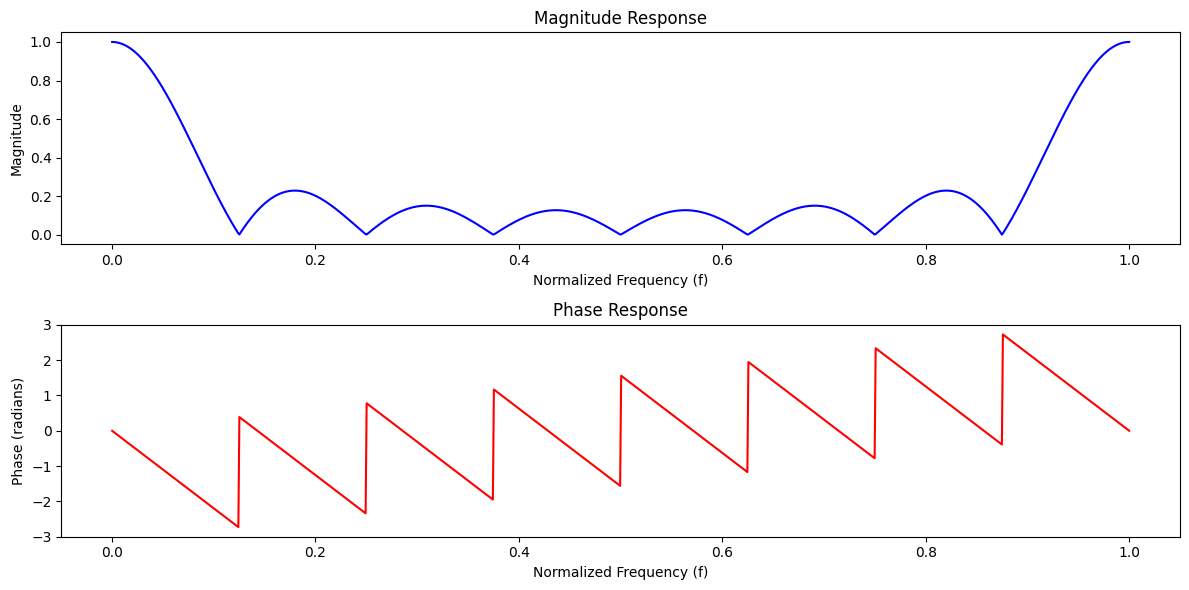

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd

f = np.linspace(0.0001, 1, 1000)  # 1000 points for smooth result
omega = 2 * np.pi * f
H = (1/8) * (1 - np.exp(-1j * 8 * omega)) / (1 - np.exp(-1j * omega))
magnitude = np.abs(H)  # Magnitude response
phase = np.angle(H)    # Phase response
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(f, magnitude, 'b')
plt.title('Magnitude Response')
plt.xlabel('Normalized Frequency (f)')
plt.ylabel('Magnitude')
plt.subplot(2, 1, 2)
plt.plot(f, phase, 'r')
plt.title('Phase Response')
plt.xlabel('Normalized Frequency (f)')
plt.ylabel('Phase (radians)')
plt.tight_layout()
plt.show()

### c) Plot signal (0.5 point)

Download the `complex.mat` file. In the `names` fields, you can check the recorded parameters. Plot the signals on a common plot.

**Hint:** You can use your own function, but remember to correct for the base and gain. Make sure to label axes and use the correct units.

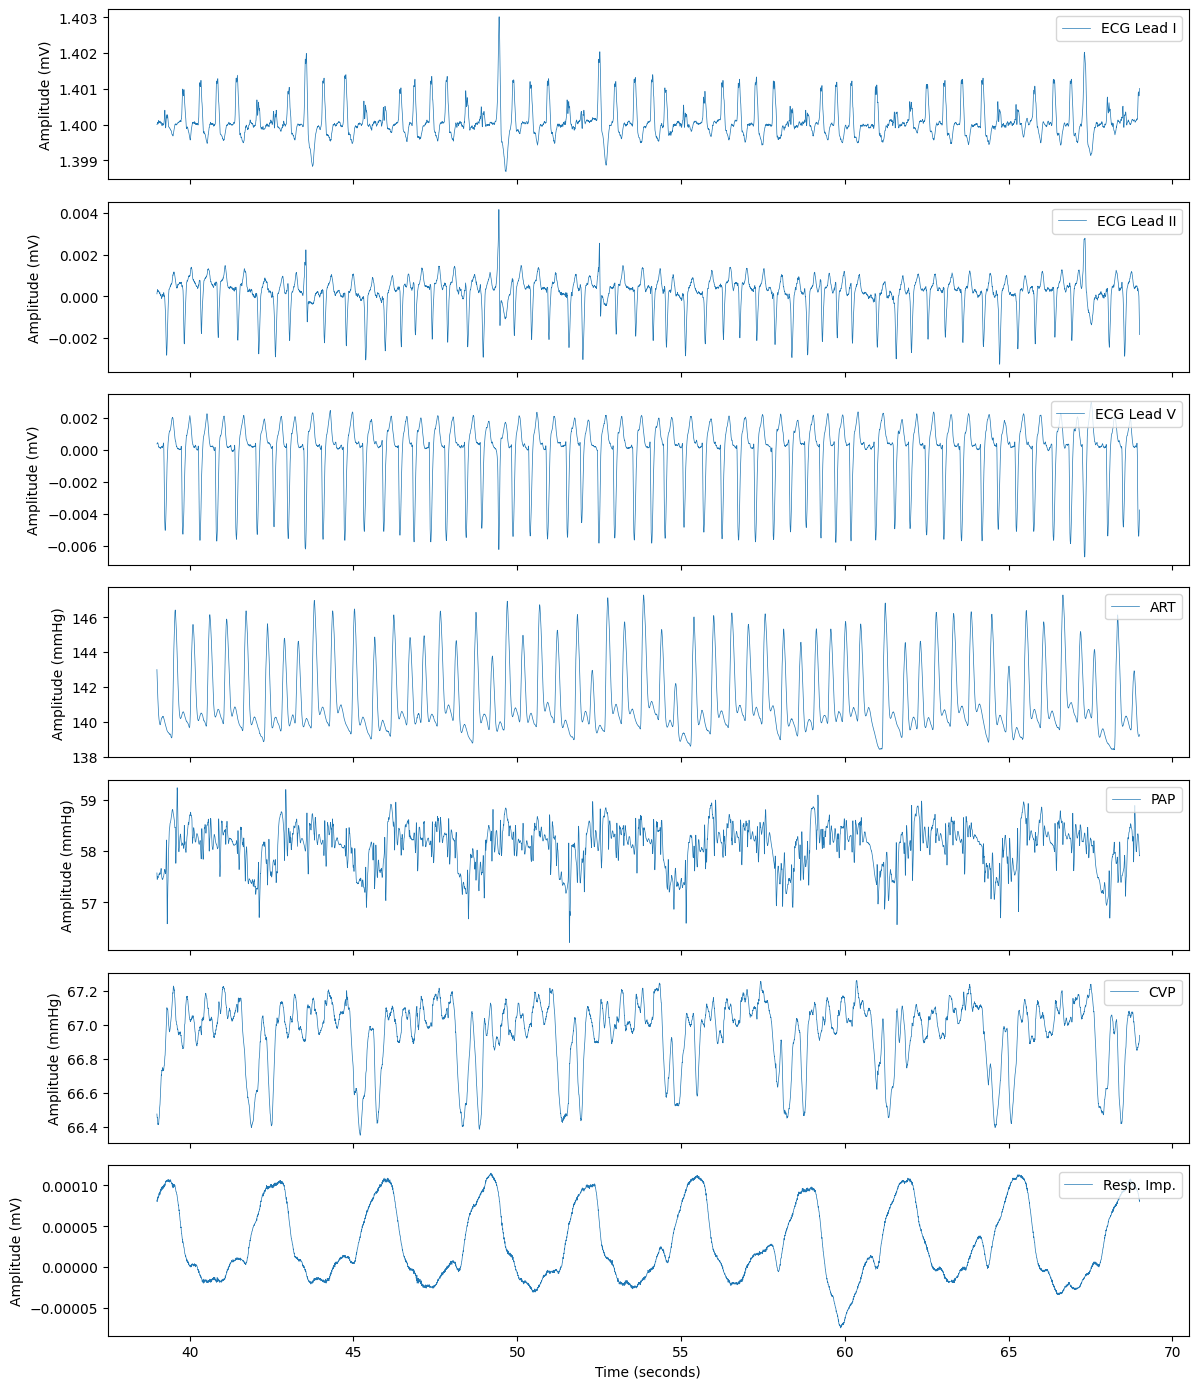

In [ ]:
def parse_info(file_path):
    info = {}
    # Read the file
    with open(file_path + ".info", 'r') as file:
        file = file.readlines()
        signals = []
        # Read the fixed information at the beginning
        info['Source'] = file[0].split(':', 1)[1]
        info['Rows'] = int(file[1].split(' ')[2])
        info['Columns'] = int(file[1].split(' ')[6])
        info['Duration'] = file[2].split(':', 1)[1]
        info['Sampling frequency'] = file[3].split('  ')[0].split(':')[1].strip()
        info['Sampling interval'] = file[3].split('  ')[1].split(':')[1].strip()
        # Read the info for each signal
        for line in file[5:-4]:
            signal = {}
            signal['Signal'] = line.split('\t')[1].strip()
            signal['Gain']   = float(line.split('\t')[2].strip())
            signal['Base']   = float(line.split('\t')[3].strip())
            signal['Units']  = line.split('\t')[4].strip()
            signals.append(signal)
        info['Signals'] = signals
    return info
def calibrate_signal(signal, base, gain):
    return (signal - base) / gain
def plot_signals(file_path, info_=False, idx=-1):
    mat_data = scipy.io.loadmat(file_path + ".mat")
    info = parse_info("mgh119m")
    time_axis = mat_data['Complex_signal'][0][0]["time"][0]
    fig, axs = plt.subplots(len(info["Signals"]), 1, figsize=(12, 2 * len(info["Signals"])), sharex=True)
    for idx, signal in enumerate(info["Signals"]):
        raw_signal = mat_data['Complex_signal'][0][0]['values'][idx]
        unit = signal["Units"]
        calibrated_signal = calibrate_signal(raw_signal, signal["Base"], signal["Gain"])

        axs[idx].plot(time_axis, calibrated_signal, linewidth=0.5, label=signal["Signal"])
        axs[idx].set_ylabel(f"Amplitude ({unit})")
        axs[idx].legend(loc="upper right")  # Replace title with legend
    axs[-1].set_xlabel("Time (seconds)")  # Only the last subplot needs the x-label
    plt.tight_layout()
    plt.show()

plot_signals("Complex_signal")

### d) Filter signal (0.5 point)

Use the filter designed in 1.b) on the central venous pressure (CVP) signal. The signal is provided in the `mgh119m.hea` and `mgh119m.info` files. Plot your result.

**Hint:** You used the `filter(b, a, signal)` function in the previous assignment. Remember what \( b \) and \( a \) are (lecture 4/2, slide 3).


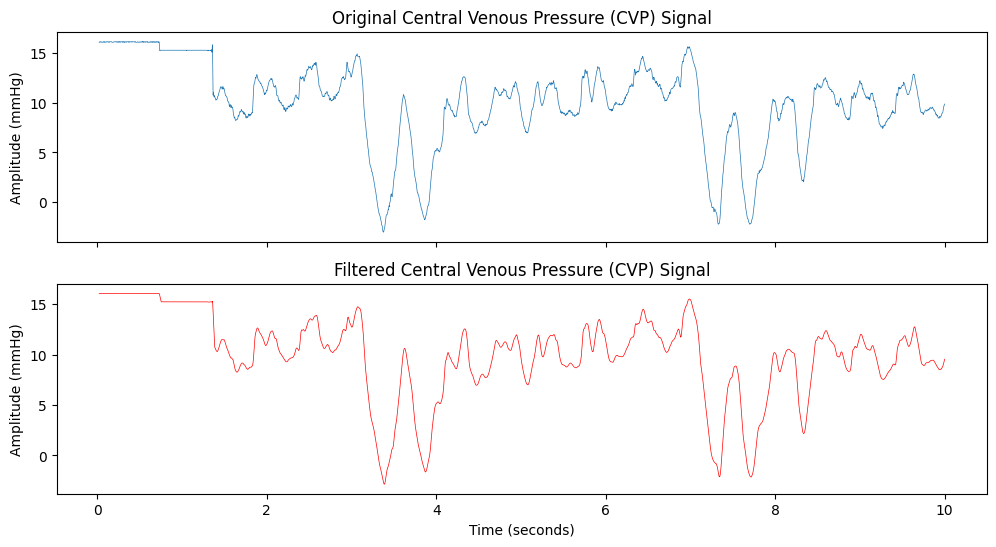

In [ ]:
mat_data = scipy.io.loadmat("mgh119m.mat")
info = parse_info("mgh119m")
sampling_frequency = int(info['Sampling frequency'][:-3])
cvp_signal = mat_data["val"][5]
unit = info["Signals"][5]["Units"]
calibrated_signal = calibrate_signal(cvp_signal, info["Signals"][5]["Base"], info["Signals"][5]["Gain"])
time_axis = np.arange(len(calibrated_signal)) / sampling_frequency

b = np.ones(8) / 8  # Moving average filter numerator
a = [1]             # Denominator is just 1 for moving average

filtered_signal = scipy.signal.lfilter(b, a, calibrated_signal)
data1 = pd.DataFrame({
    'Time': time_axis,
    'Signal': calibrated_signal
})
data2 = pd.DataFrame({
    'Time': time_axis,
    'Signal': filtered_signal
})

data1 = data1[(data1["Time"] <= 10) & (data1["Time"] >= 0.02)]
data2 = data2[(data2["Time"] <= 10) & (data2["Time"] >= 0.02)]

fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
axs[0].plot(data1["Time"], data1["Signal"], linewidth=0.5)
axs[0].set_ylabel(f"Amplitude ({unit})")
axs[0].set_title("Original Central Venous Pressure (CVP) Signal")

axs[1].plot(data2["Time"], data2["Signal"], linewidth=0.5, color='r')
axs[1].set_xlabel("Time (seconds)")
axs[1].set_ylabel(f"Amplitude ({unit})")
axs[1].set_title("Filtered Central Venous Pressure (CVP) Signal")
plt.show()



### e) Filter in physical form (0.5 point)

Write down the underlying difference equation of the filter from Task 1 in the following form:

$$
y(n) + a_1 y(n-1) + \dots + a_k y(n-k) = b_0 x(m) + b_1 x(m-1) + \dots + b_l x(m-l)
$$

#### Solution:
For a moving average filter:
- The denominator coefficients $ a_1, a_2, \dots, a_k $ are all zero because there is no feedback (no recursive part).
- The numerator coefficients $ b_0, b_1, \dots, b_7 $ correspond to the weights in the moving average, and for this filter, all the weights are $ \frac{1}{8} $.

Thus, the difference equation for the 8-point moving average filter is:

$$
y(n) = \frac{1}{8} x(n) + \frac{1}{8} x(n-1) + \frac{1}{8} x(n-2) + \frac{1}{8} x(n-3) + \frac{1}{8} x(n-4) + \frac{1}{8} x(n-5) + \frac{1}{8} x(n-6) + \frac{1}{8} x(n-7)
$$

### f) Signal-flow diagram (0.5 point)

Draw the signal-flow diagram for the realization of the filter (using adders, multipliers, and delay elements).

**Hint:** See an example in lecture 4/2, slide 3.

<img src="signal_flow.png" width="400"> 

### g) Pole-zero diagram (0.5 point)

Draw the pole-zero diagram for the filter. Is the system stable? Why or why not? You may use the function `pzmap`, but also show how the pole-zero map is related to the transfer function.

**Hint:** Refer to lecture 4/2, slide 6 for stability, or the previous lecture.

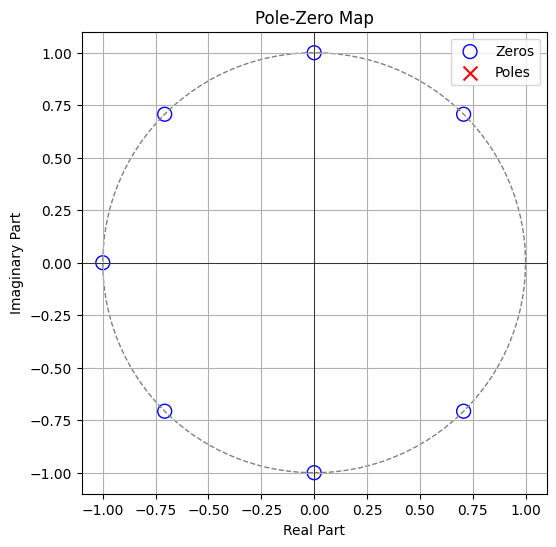

In [ ]:
zeros, poles, gain = scipy.signal.tf2zpk(b, a)

# Plot the pole-zero map
plt.figure(figsize=(6, 6))
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Plot zeros (o) and poles (x)
plt.scatter(np.real(zeros), np.imag(zeros), s=100, marker='o', facecolors='none', edgecolors='b', label='Zeros')
plt.scatter(np.real(poles), np.imag(poles), s=100, marker='x', color='r', label='Poles')

# Plot the unit circle for reference
unit_circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(unit_circle)

plt.title('Pole-Zero Map')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid(True)
plt.xlim(-1.1, 1.1)
plt.legend()
plt.show()


- **Poles**: Since the denominator is $ 1 $, the system has **no poles** other than at $ z = 0 $, which is at the origin.
- **Zeros**: The numerator is a 7th-order polynomial. The zeros of this polynomial are the roots of this equation, which are distributed evenly around the unit circle.

The system is stable if all poles are **inside the unit circle**.
- Since this is a **Finite Impulse Response (FIR)** filter, there are no poles except at the origin (which corresponds to a pole at $ z = 0$, inside the unit circle).
- The zeros lie on the unit circle, but the **absence of poles outside the unit circle** confirms the system is **stable**.


### h) Plot ECG Lead II in Time and Frequency Domain (0.5 point)

Take the data from the second ECG lead and plot it in both the time and frequency domains. Answer the following questions:
- What is the bpm (beats per minute)?
- What is the breathing rate?
- What is the frequency of the powerline noise?

**Hint:** Refer to lecture 4/1, slide 4 for more details.

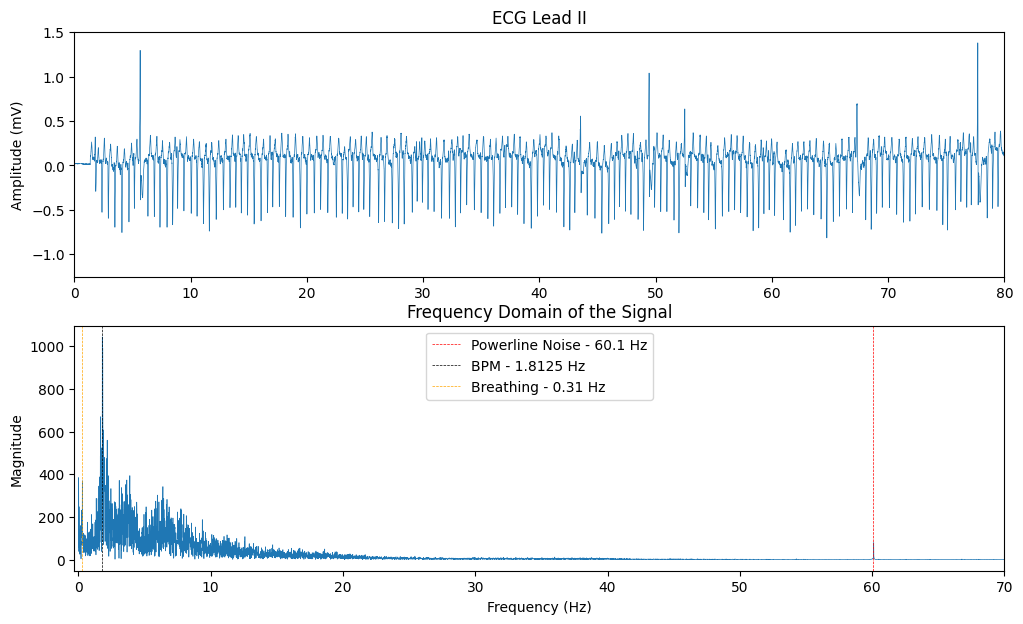

In [ ]:
mat_data = scipy.io.loadmat("mgh119m.mat")
info = parse_info("mgh119m")
sampling_frequency = int(info['Sampling frequency'][:-3])
cvp_signal = mat_data["val"][1]
unit = info["Signals"][1]["Units"]
calibrated_signal = calibrate_signal(cvp_signal, info["Signals"][1]["Base"], info["Signals"][1]["Gain"])
time_axis = np.arange(len(calibrated_signal)) / sampling_frequency

data1 = pd.DataFrame({
    'Time': time_axis,
    'Signal': calibrated_signal
})


data1 = data1[(data1["Time"] <= 100)]

fig, axs = plt.subplots(2, 1, figsize=(12, 7))
axs[0].plot(data1["Time"], data1["Signal"], linewidth=0.5)
axs[0].set_ylabel(f"Amplitude ({unit})")
axs[0].set_title(info["Signals"][1]["Signal"])
axs[0].set_xlim(0, 80)

n = len(data1["Signal"])
fft_values = np.fft.fft(data1["Signal"])
fft_frequencies = np.fft.fftfreq(n, d=1/sampling_frequency)
fft_values = np.abs(fft_values[fft_frequencies > 0])
fft_frequencies = fft_frequencies[fft_frequencies > 0]

axs[1].plot(fft_frequencies, fft_values, linewidth=0.5)
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Magnitude')
axs[1].axvline(x=60.1, color='red', linestyle='--', linewidth=0.5, label="Powerline Noise - 60.1 Hz")
axs[1].axvline(x=1.8125, color='black', linestyle='--', linewidth=0.5, label="BPM - 1.8125 Hz")
axs[1].axvline(x=0.31, color='orange', linestyle='--', linewidth=0.5, label="Breathing - 0.31 Hz")
axs[1].set_title('Frequency Domain of the Signal')

axs[1].legend()
axs[1].set_xlim(-0.3, 70)
plt.show()



- Beats per minute = $1.8125 \text{ Hz} \cdot 60 \approx 108$
- Breathing rate = $0.31 \text{ Hz} \cdot 60 \approx 18.6$
- The frequency of the powerline noise = $60.1 \text{ Hz}$

### i) Filter Powerline Noise with a Butterworth Filter (1 point)

Design a Butterworth filter to remove the powerline noise. Check the quality of the filter using `freqz()`. Plot both the filtered signal and its frequency spectrum.

**Hint:** Use the `butter` function to obtain the filter parameters \( b \) and \( a \). If needed, refer to `doc butter` for more details. See lecture 4/3, slide 7 for more information.

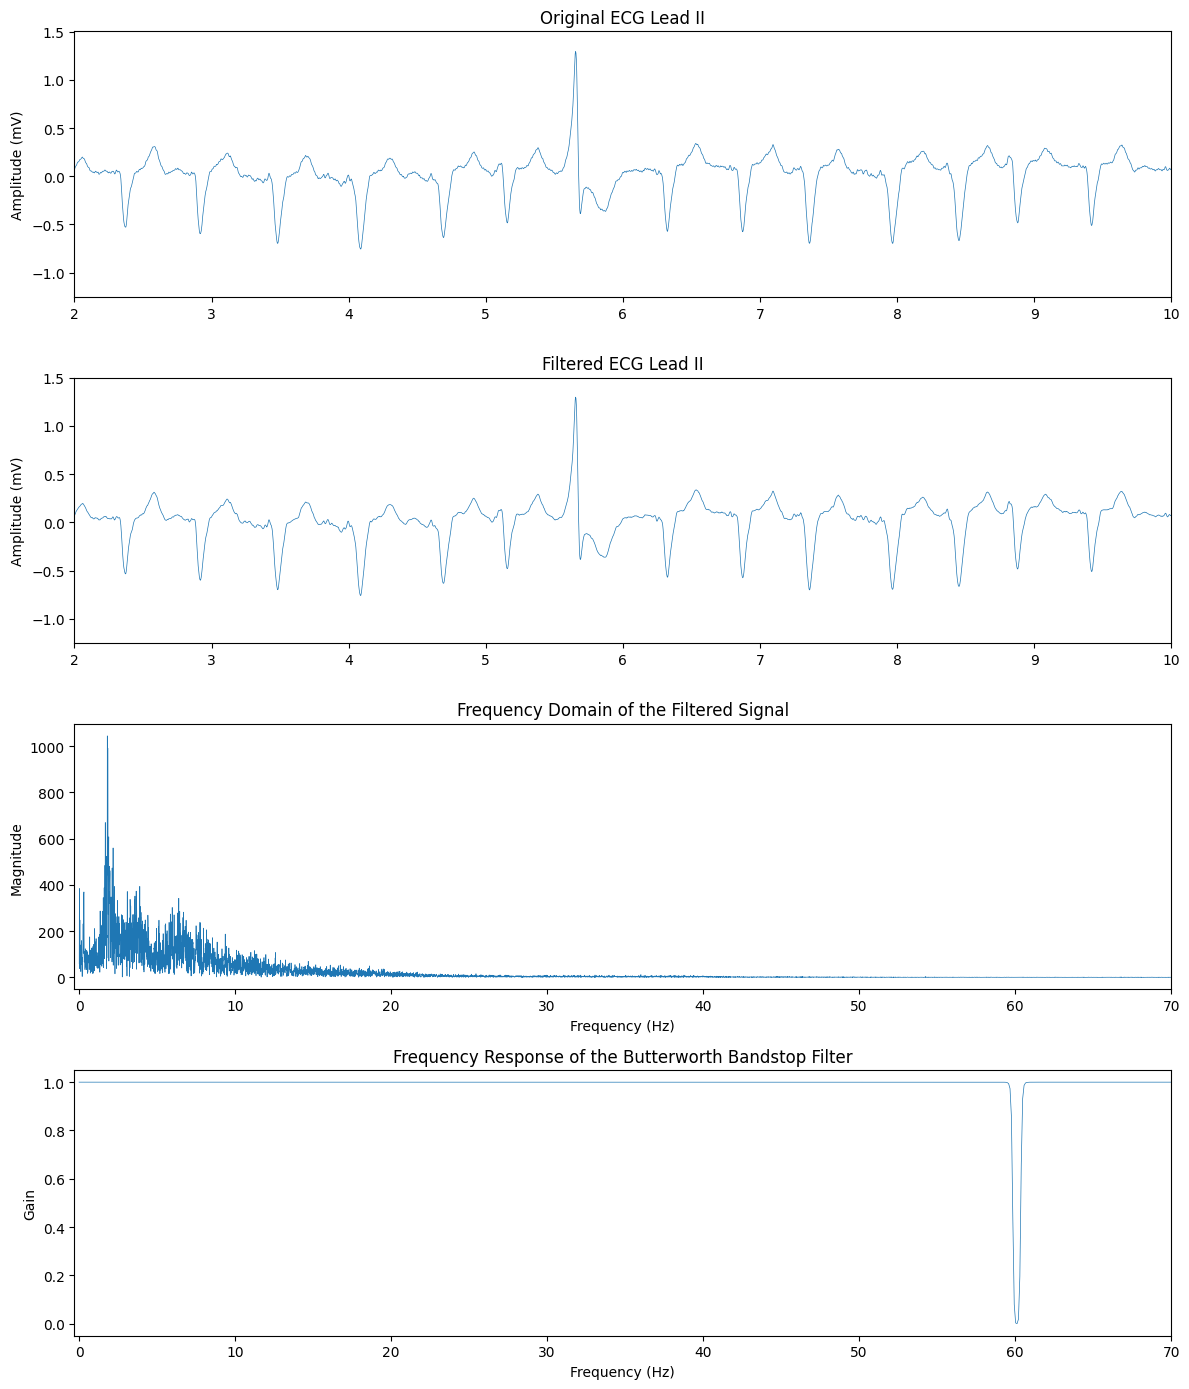

In [ ]:
from scipy.signal import butter, lfilter, freqz

powerline_freq = 60.1
nyquist = 0.5 * sampling_frequency

lowcut = powerline_freq - 0.3
highcut = powerline_freq + 0.3

low = lowcut / nyquist
high = highcut / nyquist

b, a = butter(N=4, Wn=[low, high], btype='bandstop')

filtered_signal = lfilter(b, a, data1["Signal"])

fig, axs = plt.subplots(4, 1, figsize=(12, 14))
axs[0].plot(data1["Time"], data1["Signal"], linewidth=0.5)
axs[0].set_ylabel(f"Amplitude ({unit})")
axs[0].set_title(f'Original {info["Signals"][1]["Signal"]}')
axs[0].set_xlim(2, 10)

axs[1].plot(data1["Time"], filtered_signal, linewidth=0.5)
axs[1].set_ylabel(f"Amplitude ({unit})")
axs[1].set_title(f'Filtered {info["Signals"][1]["Signal"]}')
axs[1].set_xlim(2, 10)

n = len(filtered_signal)
fft_values = np.fft.fft(filtered_signal)
fft_frequencies = np.fft.fftfreq(n, d=1/sampling_frequency)
fft_values = np.abs(fft_values[fft_frequencies > 0])
fft_frequencies = fft_frequencies[fft_frequencies > 0]

axs[2].plot(fft_frequencies, fft_values, linewidth=0.5)
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_ylabel('Magnitude')
axs[2].set_title('Frequency Domain of the Filtered Signal')
axs[2].set_xlim(-0.3, 70)

w, h = freqz(b, a, worN=2000)
axs[3].plot(0.5 * sampling_frequency * w / np.pi, np.abs(h), linewidth=0.5)
axs[3].set_title("Frequency Response of the Butterworth Bandstop Filter")
axs[3].set_xlabel('Frequency (Hz)')
axs[3].set_ylabel('Gain')
axs[3].set_xlim(-0.3, 70)

plt.tight_layout()
plt.show()


### Task 2 (4 point)

Choose one of the two tasks uploaded to the site. One task involves implementing a Wiener filter, while the other focuses on synchronized averaging. Follow the steps described in the provided `WienerFilter.pdf` and `SynchronizedAveraging.pdf`.

### Synchronized Averaging

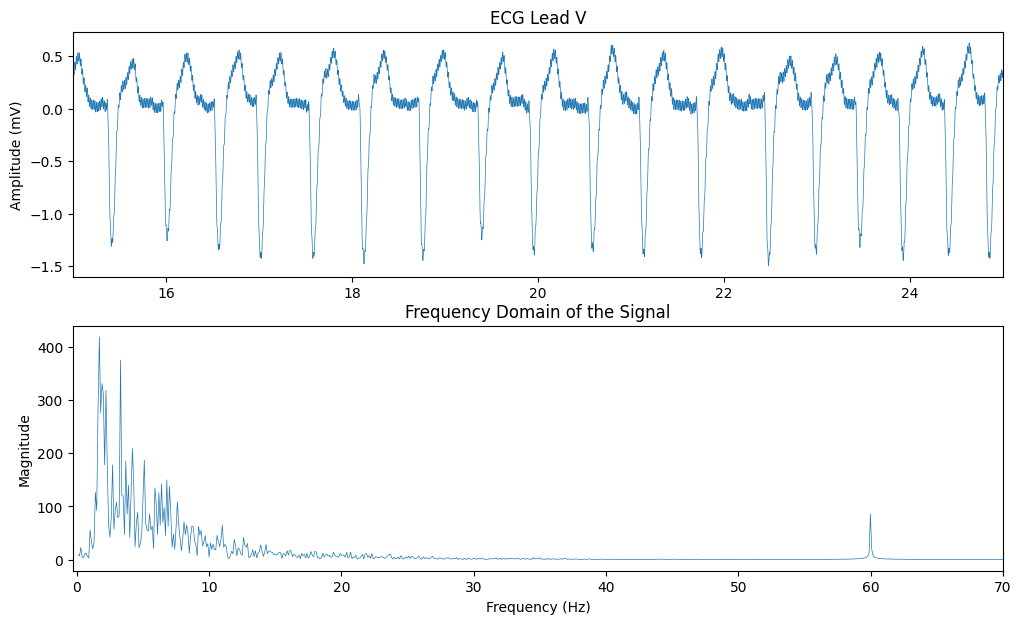

In [ ]:
ECG = mat_data["val"][2]
unit = info["Signals"][2]["Units"]
calibrated_signal = calibrate_signal(ECG, info["Signals"][2]["Base"], info["Signals"][2]["Gain"])
time_axis = np.arange(len(calibrated_signal)) / sampling_frequency
data = pd.DataFrame({
    'Time': time_axis,
    'Signal': calibrated_signal
})

start = 15
data1 = data[(data["Time"] <= start+10) & (data["Time"] >= start)]
#add noise to this short version to see the effectivenes of the method
noise_frequency = 60
noise_amplitude = 0.05
noise = noise_amplitude * np.sin(2 * np.pi * noise_frequency * data1["Time"])
data1.loc[:, "Signal"] = data1["Signal"] + noise

fig, axs = plt.subplots(2, 1, figsize=(12, 7))
axs[0].plot(data1["Time"], data1["Signal"], linewidth=0.5)
axs[0].set_ylabel(f"Amplitude ({unit})")
axs[0].set_title(info["Signals"][2]["Signal"])
axs[0].set_xlim(start, start+10)

n = len(data1["Signal"])
fft_values = np.fft.fft(data1["Signal"])
fft_frequencies = np.fft.fftfreq(n, d=1/sampling_frequency)
fft_values = np.abs(fft_values[fft_frequencies > 0])
fft_frequencies = fft_frequencies[fft_frequencies > 0]

axs[1].plot(fft_frequencies, fft_values, linewidth=0.5)
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Magnitude')
axs[1].set_title('Frequency Domain of the Signal')
axs[1].set_xlim(-0.3, 70)
plt.show()


In [ ]:
# Cross-correlation
ECG_corr = scipy.signal.correlate(data1["Signal"], data["Signal"], )
lags = scipy.signal.correlation_lags(len(data1["Signal"]), len(data["Signal"]))
ECG_corr = ECG_corr[:1 - len(data1["Signal"])]
lags = lags[:1 - len(data1["Signal"])]

# Plot the correlation result
plt.figure(figsize=(12, 4))
plt.plot(lags, ECG_corr, linewidth=0.5)
plt.xlabel('Lag in sample number')
plt.ylabel('Correlation')
plt.title('Similarity of the short signal to the long signal')

# Find peaks in the correlation result
# Set the parameters for peak detection
peaks, properties = scipy.signal.find_peaks(ECG_corr, distance=sampling_frequency*1.0, height=400)

# Plot the detected peaks
plt.plot(lags[peaks], ECG_corr[peaks], 'r*')
plt.show()



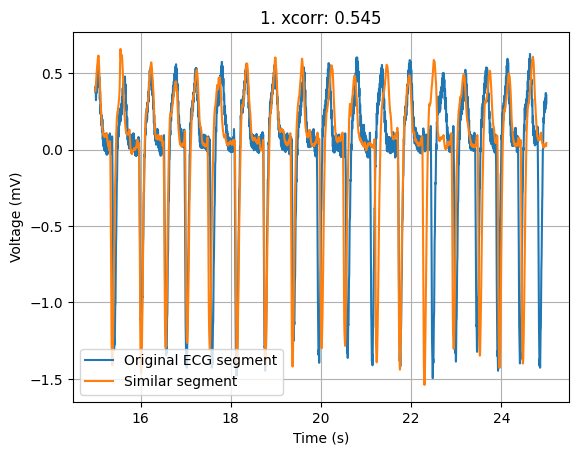

Is this segment in phase? (y/n): y


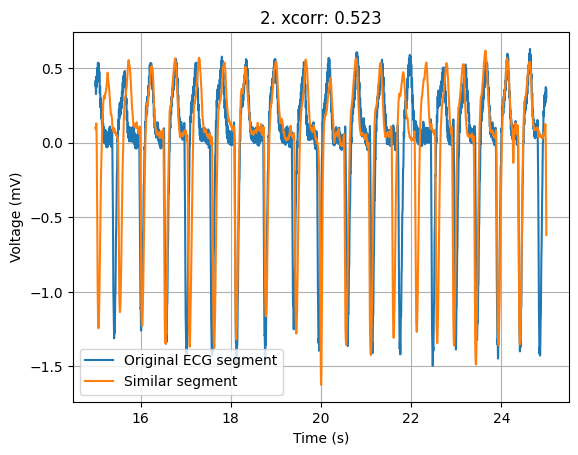

Is this segment in phase? (y/n): y


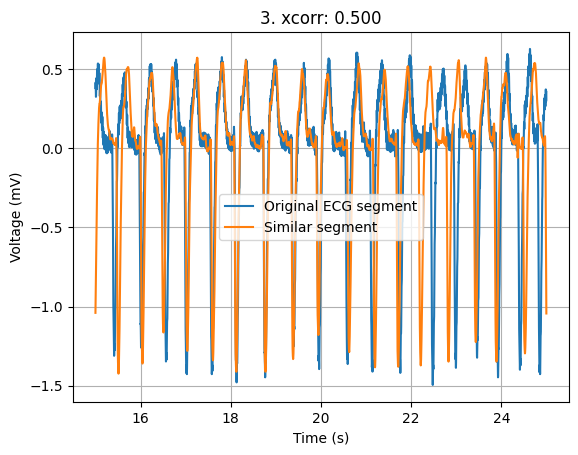

Is this segment in phase? (y/n): y


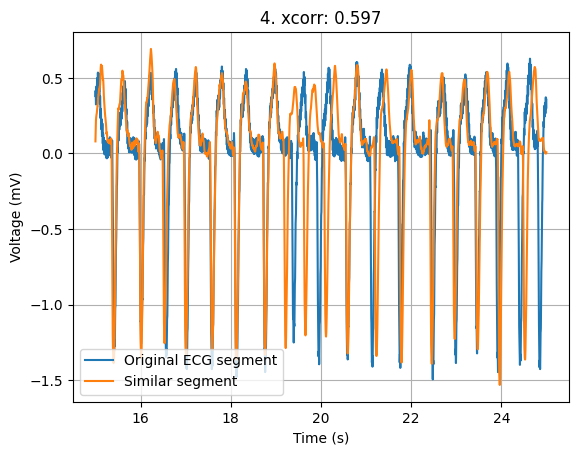

Is this segment in phase? (y/n): y


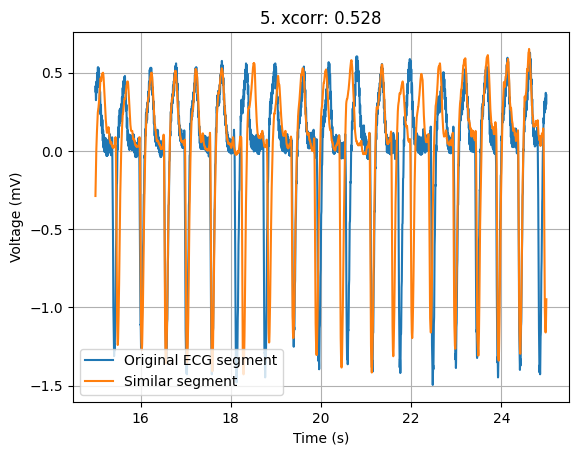

Is this segment in phase? (y/n): y


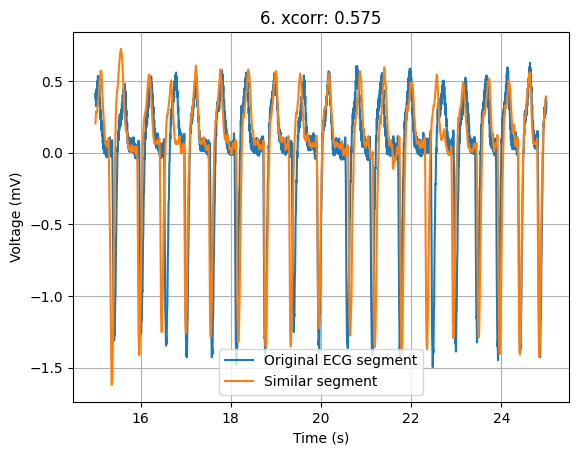

Is this segment in phase? (y/n): y


Is this segment in phase? (y/n): y


Is this segment in phase? (y/n): y


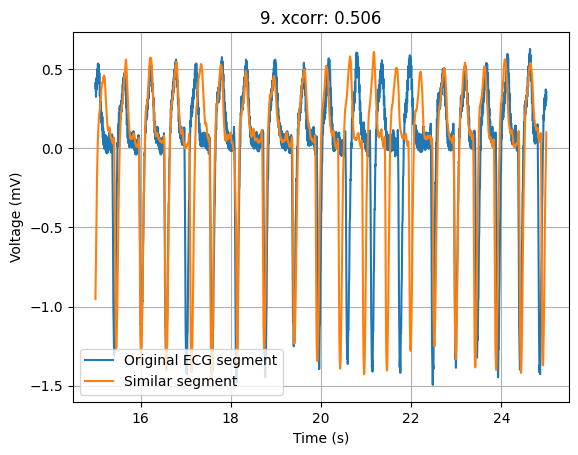

Is this segment in phase? (y/n): y


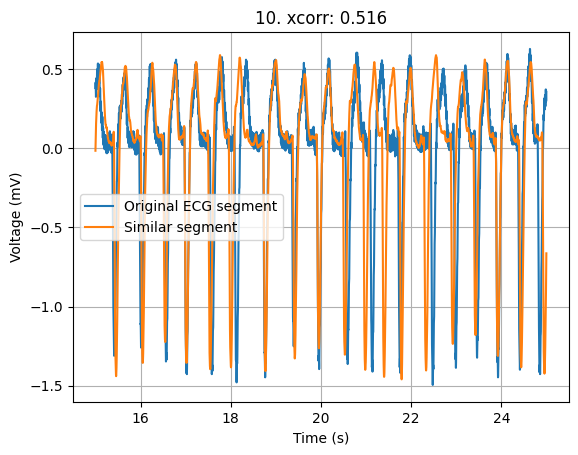

Is this segment in phase? (y/n): y


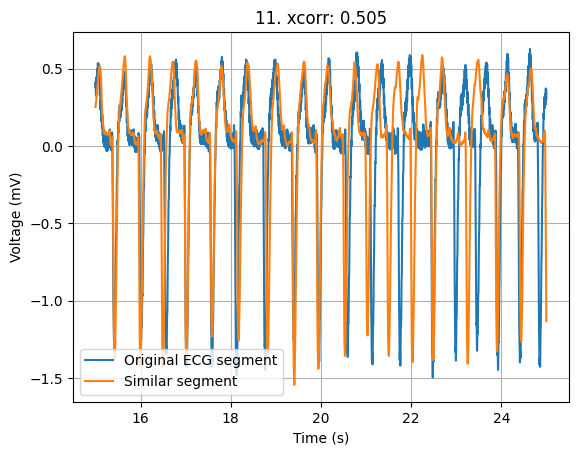

Is this segment in phase? (y/n): y


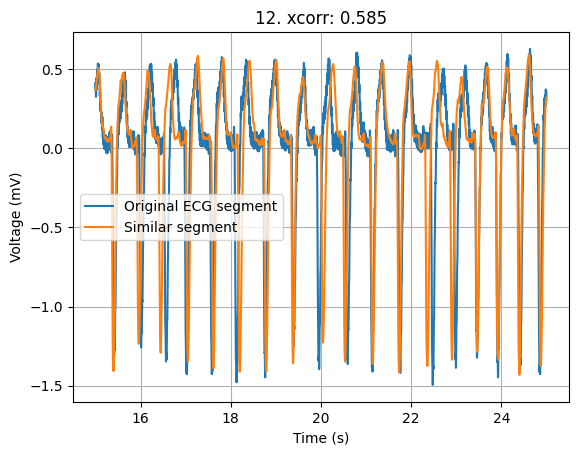

Is this segment in phase? (y/n): y


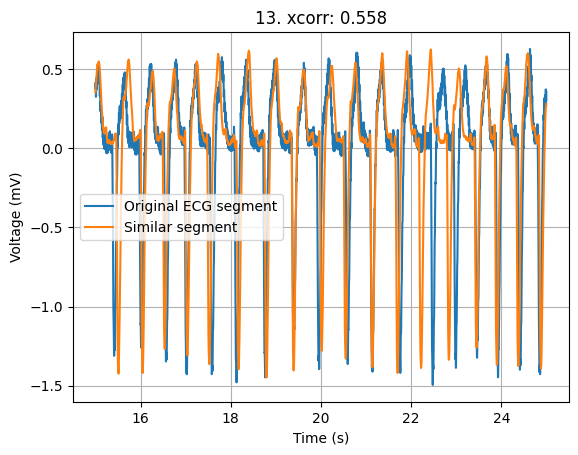

Is this segment in phase? (y/n): y


Is this segment in phase? (y/n): y


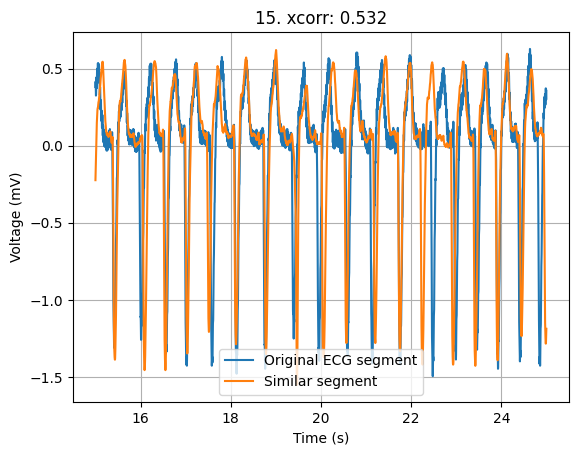

Is this segment in phase? (y/n): y


Is this segment in phase? (y/n): y


Is this segment in phase? (y/n): y
Indices of in-phase segments: [-940895, -751494, -693878, -660119, -648966, -595736, -592470, -503010, -349174, -343823, -342208, -271009, -158587, -137922, -46602, -14746, -5400]


In [ ]:
# Assuming peaks and locs (lags) have been found, and ECG_short & ECG are available
similars = []  # Store indices of segments that are in-phase

# Loop over each identified peak
for i, peak in enumerate(peaks):
    # Extract the corresponding segment from the long ECG signal based on the lag location
    loc = lags[peak]  # Get the lag value corresponding to the current peak

    # Extract the segment from the long signal
    temp = data["Signal"][-loc:-loc + len(data1["Signal"])]

    # Plot the short ECG segment and the found segment
    plt.plot(data1["Time"], data1["Signal"], label='Original ECG segment')
    plt.plot(data1["Time"], temp, label='Similar segment')

    # Customize the plot
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (mV)')
    plt.legend()
    plt.title(f'{i+1}. xcorr: {ECG_corr[peak]/max(ECG_corr):.3f}')
    plt.grid()

    # Show the plot and wait for user input before moving to the next segment
    plt.show()

    # If the user confirms it's a good match, store the index (in-phase segments)
    user_input = input("Is this segment in phase? (y/n): ")
    if user_input.lower() == 'y':
        similars.append(loc)

# After the loop, you can process the 'similars' list further if needed
print(f"Indices of in-phase segments: {similars}")


In [ ]:
to_average = np.zeros((len(similars), len(data1["Signal"])))

# Store each similar segment in the array
for i, ind in enumerate(similars):
    # Extract the segment from the long signal
    loc = lags[ind]  # Get the lag corresponding to the similar segment
    to_average[i, :] = data["Signal"][-loc:-loc + len(data1["Signal"])]  # Store the segment in to_average

# Calculate the average of the similar segments
averaged = np.mean(to_average, axis=0)

fig, axs = plt.subplots(3, 1, figsize=(12, 10))
axs[0].plot(data1["Time"], data1["Signal"], linewidth=0.5)
axs[0].set_ylabel(f"Amplitude ({unit})")
axs[0].set_title('Original Noisy Segment')
axs[0].set_xlim(start, start+10)

axs[1].plot(data1["Time"], averaged, linewidth=0.5)
axs[1].set_ylabel(f"Amplitude ({unit})")
axs[1].set_title('Synchronized Average of Similar Segments')
axs[1].set_xlim(start, start+10)

n = len(averaged)
fft_values = np.fft.fft(averaged)
fft_frequencies = np.fft.fftfreq(n, d=1/sampling_frequency)
fft_values = np.abs(fft_values[fft_frequencies > 0])
fft_frequencies = fft_frequencies[fft_frequencies > 0]

axs[2].plot(fft_frequencies, fft_values, linewidth=0.5)
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_ylabel('Magnitude')
axs[2].set_title('Frequency Domain of the Signal')
axs[2].set_xlim(-0.3, 70)
plt.show()


When we plot the synchronized average of the similar ECG segments, what we should typically see is a clearer version of the original ECG signal segment, with the noise and random fluctuations reduced. The effectiveness of this method also depends on how well the similar segments are aligned with the original signal. In our attempt, we definitely see a clearer version that do not have noise in 60 Hz frequency as seen on the FFT of the averaged signal. But in our case, the segments are not fully aligned  therefore we see smearing or less distinct features. But overall we succesfully removed the noise.


#### Assumptions of this Method

1. Periodic or consistent signal structure: The method assumes that the signal you are averaging (like an ECG) has consistent and repetitive features, such as heartbeats. This allows you to align similar segments and average them. If the ECG signal is irregular or varies a lot between heartbeats, this method may not work as well because the differences between segments will not cancel out cleanly.

2. Noise characteristics: The method assumes that the noise is random and that it averages out over multiple segments. This is known as the assumption of "uncorrelated noise." If there is correlated noise (i.e., noise that repeats similarly across segments), it won't be canceled out by averaging, and the noise may still appear in the averaged signal.

3. Proper segment alignment: The method relies on accurate alignment of the segments. Cross-correlation helps find the best matches, but perfect alignment is critical. If segments are not perfectly aligned (e.g., due to jitter or sampling issues), the resulting averaged signal could be blurry, with important features like peaks or QRS complexes shifted.


### Task 3 (5 point)

Using the pyPPG toolbox’s prefiltering as a reference, design an equivalent FIR filter for systolic peak detection.
1. Apply the designed FIR filter on the example signal provided by the toolbox.
2. Plot the peak detection results for the IIR filter (from the toolbox) and your FIR filter.
3. Generate and compare the Bode diagram and pole-zero (PZ) map for both the IIR and FIR filters.
4. Provide the transfer functions for both the IIR and FIR filters.
5. Based on the plots (Bode diagram, PZ-map, and peak detection results), explain the differences between the IIR and FIR filters in terms of their frequency response, stability, and peak detection accuracy.

In [ ]:
!pip install pyPPG==1.0.41

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


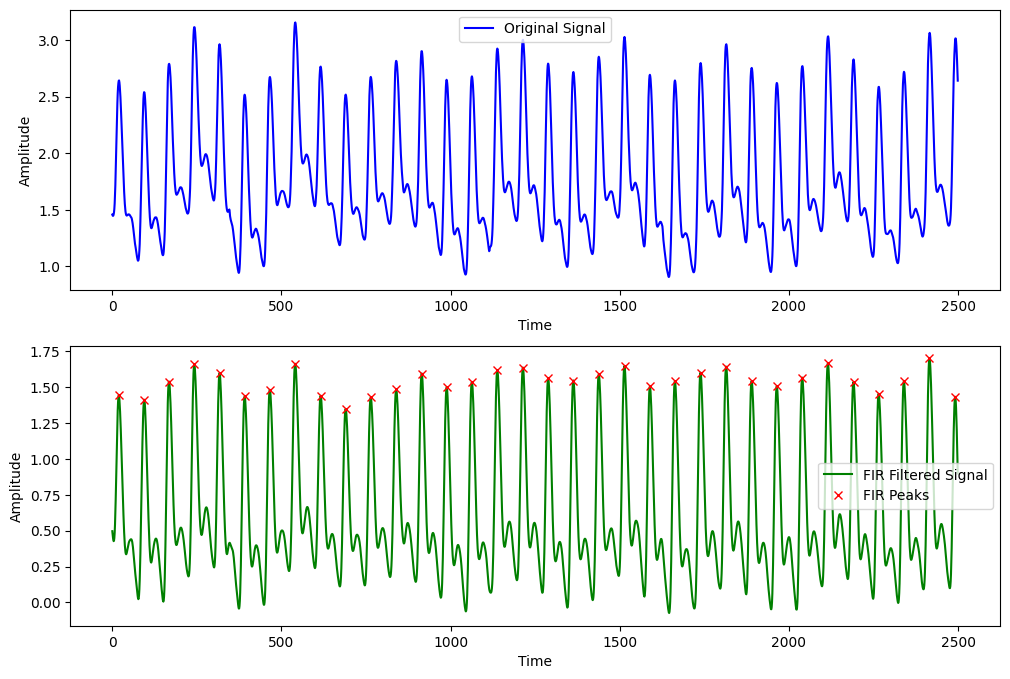

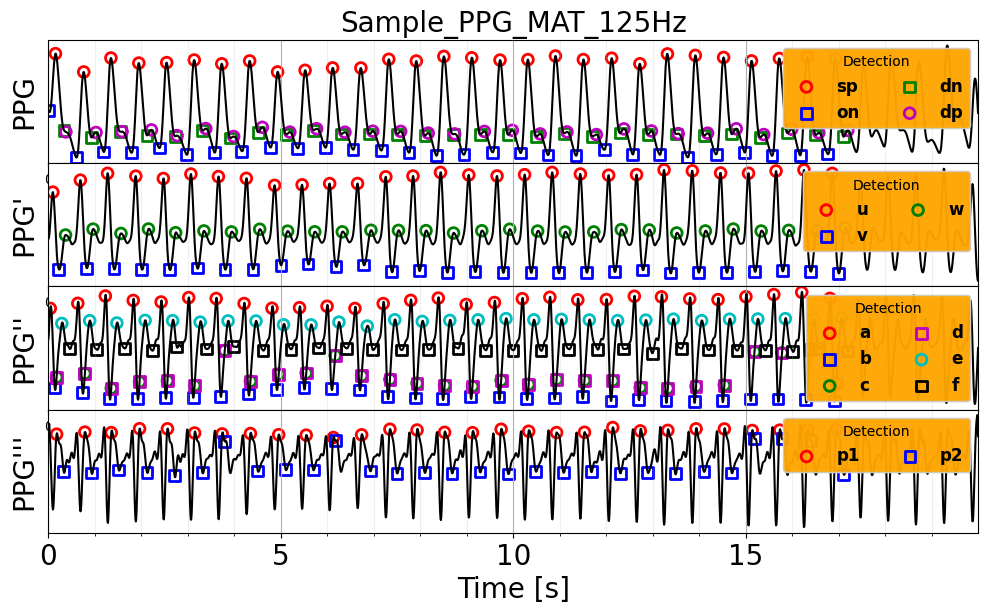

Figure has been saved in the "temp_dir".


In [ ]:
from pyPPG import PPG, Fiducials, Biomarkers
from pyPPG.datahandling import load_data, plot_fiducials, save_data
import pyPPG.preproc as PP
import pyPPG.fiducials as FP
import pyPPG.biomarkers as BM
import pyPPG.ppg_sqi as SQI

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import filtfilt, find_peaks

# Load PPG data
ppg_data_path = '/content/drive/MyDrive/Sample_PPG_MAT_125Hz.mat'
start_index = 0
end_index = -1
ppg_signal_data = load_data(data_path=ppg_data_path, start_sig=start_index, end_sig=end_index, use_tk=False)

# Use 20 seconds of the signal
ppg_signal_data.v = ppg_signal_data.v[0:20*ppg_signal_data.fs]

# Filtering parameters
ppg_signal_data.filtering = True
ppg_signal_data.lower_cutoff_freq = 0.5000001
ppg_signal_data.upper_cutoff_freq = 12
ppg_signal_data.filter_order = 4
ppg_signal_data.smoothing_windows = {'ppg': 50, 'vpg': 10, 'apg': 10, 'jpg': 10}

# Initialize Preprocess class
preprocess_obj = PP.Preprocess(fL=ppg_signal_data.lower_cutoff_freq, fH=ppg_signal_data.upper_cutoff_freq,
                              order=ppg_signal_data.filter_order, sm_wins=ppg_signal_data.smoothing_windows)

# Get preprocessed PPG signals
ppg_signal_data.ppg, ppg_signal_data.vpg, ppg_signal_data.apg, ppg_signal_data.jpg = preprocess_obj.get_signals(s=ppg_signal_data)

# FIR filter function
def fir_filter_applier(input_signal, sampling_rate, lower_cutoff, upper_cutoff, num_taps=101):
    nyquist_freq = 0.5 * sampling_rate
    filter_taps = signal.firwin(num_taps, [lower_cutoff / nyquist_freq, upper_cutoff / nyquist_freq], pass_zero=False)
    filtered_output = filtfilt(filter_taps, 1.0, input_signal)
    return filtered_output

# FIR filter parameters
lower_cutoff, upper_cutoff = 0.5, 12
fir_filtered_output = fir_filter_applier(ppg_signal_data.v, ppg_signal_data.fs, lower_cutoff, upper_cutoff)

# Detect peaks
fir_peaks, _ = find_peaks(fir_filtered_output, distance=round(0.5 * ppg_signal_data.fs))

# Plot the original signal, IIR-filtered signal, and FIR-filtered signal with peak detection
plt.figure(figsize=(12, 8))

# Original signal
plt.subplot(2, 1, 1)
plt.plot(signal_data.v, label="Original Signal", color='blue')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
#plt.title("Original Signal")

# FIR Filtered signal with peaks
plt.subplot(2, 1, 2)
plt.plot(fir_filtered_signal, label="FIR Filtered Signal", color='green')
plt.plot(peaks_fir, fir_filtered_signal[peaks_fir], "x", label="FIR Peaks", color='red')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# IIR Filtered signal with peaks (Plot fiducial points)
plot_fiducials(s, fp, savingfolder, legend_fontsize=12)

#plt.tight_layout()
plt.show()


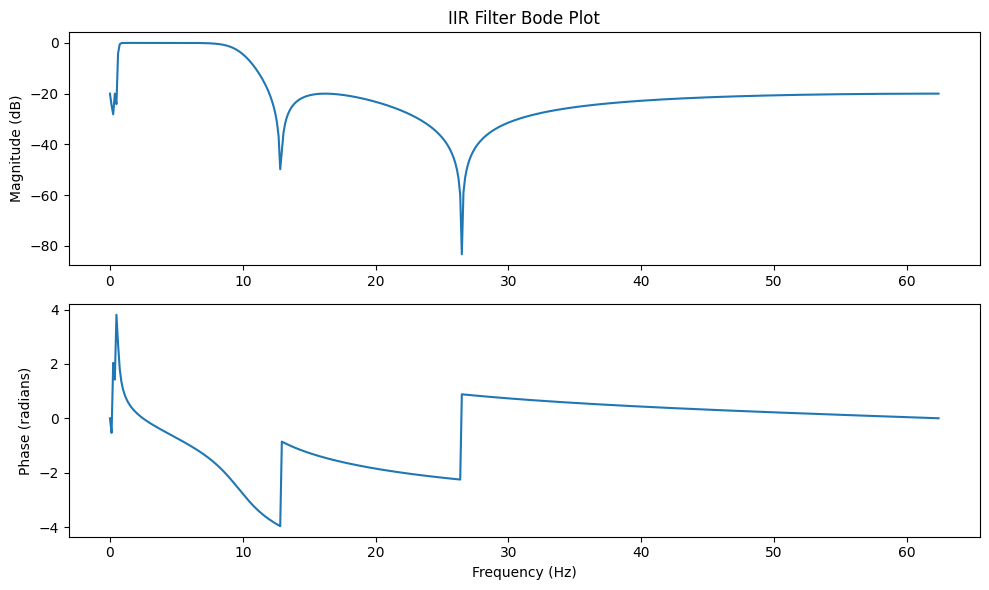

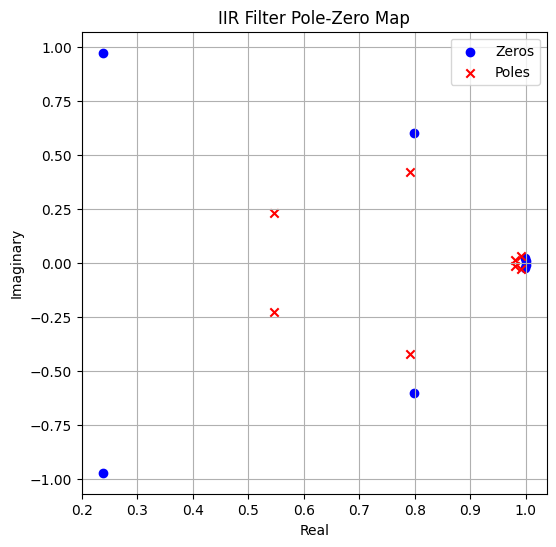

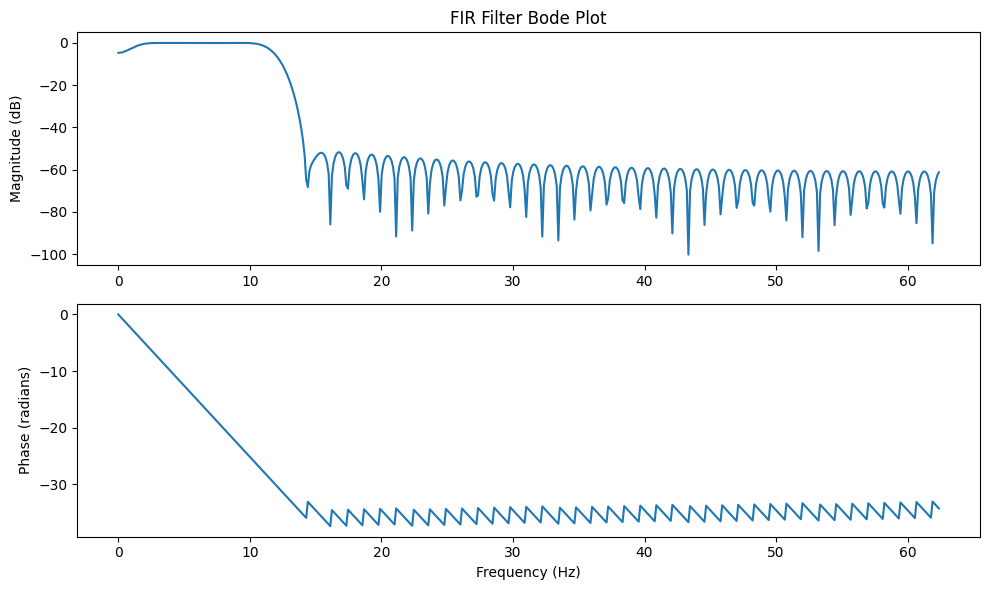

IIR Transfer Function (b, a):
 b - [ 0.09044104 -0.5490694   1.5413179  -2.67066771  3.17595637 -2.67066771
  1.5413179  -0.5490694   0.09044104],
 a - [  1.          -6.62041668  19.27473001 -32.26215043  33.97994431
 -23.07453675   9.87338154  -2.43763847   0.26668651]
FIR Transfer Function (taps):
 [-9.67335496e-04 -9.97961454e-04 -8.64995819e-04 -5.96362304e-04
 -2.68637914e-04 -6.21515814e-19  7.53208249e-05 -1.48206954e-04
 -6.94629734e-04 -1.46787869e-03 -2.25231418e-03 -2.76741066e-03
 -2.76983670e-03 -2.17070654e-03 -1.11850817e-03  5.13740471e-18
  6.63717214e-04  4.06860595e-04 -9.68034493e-04 -3.24133327e-03
 -5.77104745e-03 -7.66546871e-03 -8.09880624e-03 -6.66678087e-03
 -3.64155564e-03  3.27387997e-18  2.83073471e-03  3.46053422e-03
  1.10266910e-03 -3.99419997e-03 -1.04453825e-02 -1.60602764e-02
 -1.85499273e-02 -1.64026179e-02 -9.61875037e-03  7.01875882e-19
  9.19272205e-03  1.41920095e-02  1.20399744e-02  1.85285748e-03
 -1.44202957e-02 -3.20833580e-02 -4.47143026e-0

In [ ]:
# Functions to plot Bode diagrams and Pole-Zero maps for IIR and FIR filters
def plot_bode_and_pz(b, a, filter_type='IIR'):
    """
    Plot the Bode diagram (magnitude and phase response) and Pole-Zero map for the filter
    defined by coefficients b (numerator) and a (denominator).
    """
    # Generate Bode plot for the filter
    w, h = signal.freqz(b, a, fs=signal_data.fs)  # Frequency response
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

    # Magnitude response (in dB)
    ax1.plot(w, 20 * np.log10(abs(h)), label=f"{filter_type} Magnitude")
    ax1.set_title(f'{filter_type} Filter Bode Plot')
    ax1.set_ylabel('Magnitude (dB)')

    # Phase response (in radians)
    ax2.plot(w, np.unwrap(np.angle(h)), label=f"{filter_type} Phase")
    ax2.set_ylabel('Phase (radians)')
    ax2.set_xlabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

    # Plot the Pole-Zero Map
    z, p, k = signal.tf2zpk(b, a)  # Compute poles (p), zeros (z), and gain (k)
    plt.figure(figsize=(6, 6))
    plt.scatter(np.real(z), np.imag(z), label='Zeros', marker='o', color='blue')  # Plot zeros
    plt.scatter(np.real(p), np.imag(p), label='Poles', marker='x', color='red')   # Plot poles
    plt.title(f'{filter_type} Filter Pole-Zero Map')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.grid()
    plt.legend()
    plt.show()

# FIR filter design using the window method
def apply_fir_filter(input_signal, fs, fL, fH, numtaps=101):
    """
    Apply an FIR bandpass filter to the input signal using the window method.
    The filter is designed with the given lower (fL) and upper (fH) cutoff frequencies.
    """
    nyquist = 0.5 * fs  # Nyquist frequency
    taps = signal.firwin(numtaps, [fL / nyquist, fH / nyquist], pass_zero=False)  # FIR filter design
    filtered_signal = filtfilt(taps, 1.0, input_signal)  # Apply the FIR filter using filtfilt (zero-phase filtering)
    return filtered_signal, taps

# Example FIR filter parameters
fL, fH = 0.5, 12  # Lower and upper cutoff frequencies for FIR filter
fir_filtered_signal, fir_taps = apply_fir_filter(signal_data.v, signal_data.fs, fL, fH)  # Apply FIR filter

# IIR filter design using Chebyshev Type II filter
def apply_iir_filter(input_signal, fs, fL, fH, order=4):
    """
    Apply an IIR Chebyshev Type II filter (bandpass or lowpass depending on fL)
    to the input signal.
    """
    if fL == 0:  # Lowpass filter if lower cutoff is 0
        b, a = signal.cheby2(order, 20, fH, 'low', fs=fs)
    else:  # Bandpass filter if lower cutoff is not 0
        b, a = signal.cheby2(order, 20, [fL, fH], 'bandpass', fs=fs)
    iir_filtered_signal = filtfilt(b, a, input_signal)  # Apply the IIR filter using filtfilt
    return iir_filtered_signal, b, a

# Apply IIR filter
iir_filtered_signal, iir_b, iir_a = apply_iir_filter(signal_data.v, signal_data.fs, fL, fH)

# Plot Bode and Pole-Zero maps for both IIR and FIR filters
plot_bode_and_pz(iir_b, iir_a, filter_type='IIR')  # IIR filter Bode and Pole-Zero plots
plot_bode_and_pz(fir_taps, [1.0], filter_type='FIR')  # FIR filter Bode and Pole-Zero plots

# Transfer function representations
from scipy.signal import TransferFunction as tf

# IIR transfer function
iir_tf = signal.TransferFunction(iir_b, iir_a, dt=1/signal_data.fs)
print(f"IIR Transfer Function (b, a):\n b - {iir_b},\n a - {iir_a}")

# FIR transfer function (FIR filters have a denominator of [1.0])
fir_tf = signal.TransferFunction(fir_taps, [1.0], dt=1/signal_data.fs)
print(f"FIR Transfer Function (taps):\n {fir_taps}")


Comparison of IIR and FIR filters based on the Bode diagram, Pole-Zero map, and peak detection results:

**1. Frequency Response**

**IIR Filter:**
* Generally has a sharper roll-off near the cutoff frequency, enabling more precise filtering.
* Has a nonlinear phase response, which can introduce phase distortion in time-domain signals and potentially affect the timing of peak detection.

**FIR Filter:**
* Maintains a linear phase response, preserving the shape of the original signal.
* The roll-off tends to be more gradual than that of an IIR filter of the same order, which can result in less aggressive noise suppression.

**2. Stability**

**IIR Filter:**
* Can become unstable if the poles are located outside the unit circle in the z-plane. However, filters like Chebyshev Type II can ensure stability through careful design and pole placement.

**FIR Filter:**
* Always stable, as its poles are positioned at the origin in the z-plane, making it ideal for real-time applications where stability is crucial.

**3. Peak Detection Accuracy**

**IIR Filter:**
* Its steeper frequency response allows better noise suppression, potentially leading to more pronounced peak detection in selective frequency environments.
* However, its nonlinear phase response may slightly alter the timing of detected peaks, which could affect performance in time-sensitive tasks.

**FIR Filter:**
* The linear phase response ensures accurate timing of peaks, which is beneficial for applications requiring precise timing, such as heart rate monitoring from PPG signals.
* The gentler roll-off may permit some noise to pass through, which can influence detection accuracy in noisy conditions.

# Lecture Notes

## Week 4 - Noise Filtering

### Examples of noise:
- **Biomedical signals:** Offset due to breathing, sound from the digestive system, any external noise when listening to a heartbeat.
- **Physical world:** Flickering noise at low frequencies when measuring electricity, thermal noise depending on temperature and bandwidth.

### How to model noise

- **Additive noise:** Recover the original signal by subtracting noise. Sometimes, noise can be added deliberately to cancel out certain patterns.
  
- **Multiplicative noise:** Different impact on different levels of signals. For example, illumination speckles in imaging due to lighting can be considered multiplicative noise. It can be removed by linearization, often using logarithms.

### ECG Noise

- Movement of cables (baseline wandering).
- Pulmonary noise.
- Muscle noise (twitches).
- Offset due to breathing.

### Synchronized Averaging

Segments of the signal are cut out, aligned, and averaged. Commonly used in EEG to detect hidden patterns that are masked by noise. Averaging uncovers patterns in signals that would typically be hidden due to noise.

This technique is also applied in ultrasound by sending pings multiple times via the transducer.

For effectiveness, similar events need to happen. For example a heartbeat. Noise should not be correlated with itself or the signal. Any pathologies will also blend out.

- **Why does it work?**  
  SNR (Signal-to-Noise Ratio) improves by √N if you have N independent copies (samples) of the same signal.

- **When does it not work?**  
  - *Vectorcardiography:* AC noise is correlated with the signal. It must be filtered out first, then averaging can be applied.

### From Fourier to Z-domain

The Z-domain is a discrete-time extension of the Fourier domain, used in digital signal processing. The Fourier transform is a special case of the Z-transform, evaluated on the unit circle  $ z = e^{j\omega} $, where $ \omega $ is the frequency.

#### Filters in Z-domain

$$
H(z) = \frac{Y(z)}{X(z)} = \frac{b_0 + b_1 z^{-1} + b_2 z^{-2} + \dots + b_n z^{-n}}{1 + a_1 z^{-1} + a_2 z^{-2} + \dots + a_m z^{-m}}
$$

Transfer function in the Z-domain describes how filters behave with respect to input and output signals.

- The system is stable if poles lie on the left-hand side in the Z-domain (or within the unit circle for the Fourier transform).

### Bode Diagrams

A Bode diagram plots the gain and phase of a system as a function of frequency. It helps to visualize the behavior of filters in frequency response and phase delay.

### Delays in Filters

Filters often introduce delays due to their structure. In an averaging filter, delay depends on how many samples are considered before applying the filter.

image.png

Lower frequency signals experience smaller delays compared to higher frequency signals.

### Pole-Zero Placement

Filter design is based on the placement of poles and zeros in the Z-plane to enhance or eliminate specific frequency components.

Examples:
- **Moving average filter:**  
  $$
  y[n] = \frac{1}{N} \sum_{k=0}^{N-1} x[n-k]
  $$

- **Butterworth filter:** Often used due to its maximally flat response and lack of ripples in the passband.

- **Chebyshev filter:** Allows for steeper roll-offs but introduces ripples in the passband.

- **Elliptic filter:** Offers the steepest cutoff for a given order but at the cost of ripples in both the passband and stopband.

#### Why do we require filters to have a gradual cutoff?

A steep cutoff means the filter in the time domain corresponds to convolving the signal with a sinc function, which introduces ripples. More filter parameters allow smoother transitions.

### Wiener Filter

- **Autocorrelation:** Calculating the autocorrelation involves multiplying the signal with a delayed version of itself. An autocorrelated signal can serve as a reference for Wiener filtering.

Wiener filtering works well for recovering signals with a known signal-to-noise ratio (SNR).

$$
H(\omega) = \frac{S_x(\omega)}{S_x(\omega) + S_n(\omega)}
$$

Where $ S_x(\omega) $ is the signal's power spectral density and $ S_n(\omega) $ is the noise's power spectral density.

- **Applications:** Used in any domain where you can combine a noisy signal with a reference to recover the true signal, such as in speech enhancement or denoising medical signals.

### Adaptive Filtering

Noise is not always constant with time. For example, when the guts start to work during an ECG. You might end up accidentally filtering out the heart rate. In such cases, adaptability is required. In an EEG, the EOG (eye movement) adds noise to the desired signal. You can subtract EOG from ECG while adapting to amplitude.

---

## Week 5 - Event Detection

### Examples of Events

- Arrhythmia, stroke, firing of neurons, S1 and S2 sounds in the heart, muscle contraction in EMG, epilepsy using EEG, sleep apnea, etc.

### Pipeline for QRS Detection

image.png

To make events such as heartbeats more prominent, signals can be differentiated. However, this also amplifies noise.

#### How to filter superimposed events?

Linear filters struggle to separate such events since similar spectral content cannot be fully isolated.

- **Local filtering:** If the heart rate is known, you can adjust cutoff frequencies based on expected signal characteristics.
- **Polynomial fitting:** Use a polynomial to fit measured data and filter out noise.

### Envelope Detection

The envelope of a signal can be used to track the top peaks, such as in breathing detection where impedance changes due to air intake (amplitude modulation). Detection can be performed by either using constant thresholds or adaptive ones based on previous events.

- **Local energy method:** Tuning the window size is necessary to properly capture the signal’s envelope.

### Hilbert Transform

A Hilbert transform creates a new signal with the same amplitude as the original but shifts the phase by 90 degrees. For a sine wave, the Hilbert transform is a cosine wave.

$$
H(f) = -j \cdot \text{sign}(f)
$$

The result is an analytic signal that can be used to extract the envelope of a signal.

In ultrasound images, a signal is transmitted to the tissues and reflected. The carrier and actual signal are used to form the envelope.

The Hilbert transform doesn't need any parameters. However, the signals need to be around the zero line, i.e., the mean is subtracted from the signal.

### Pan-Tompkins Algorithm

A method for detecting the QRS complex in ECG signals, typically designed for $ f_s = 200 $ Hz but adaptable to other frequencies.

#### The algorithm consists of:
1. Filtering.
2. Differentiation.
3. Squaring.
4. Integration.
5. Thresholding.

A lot of parameters from the envelope and the thresholds can be changed. The Tompkins algorithm remembers the previous events to update parameters.

### Hidden Markov Model

A statistical model used for sequence modeling, where transitions between states (such as the different phases of an ECG) are represented by probabilities. Semi-Markov models introduce durations for each state.

LSTM and RNN models, commonly used for time-series data, can also be applied for event detection. Applications include detecting sleep spindles using EEG.

The algorithm starts with annotation of the data, bandpass filtering, normalization, convolution layers, and lastly bidirectional LSTMs that give the output.

### References
1. Sörnmo, L., & Laguna, P. (2005). *Bioelectrical Signal Processing in Cardiac and Neurological Applications*. Elsevier.  
2. Haykin, S. (1996). *Adaptive Filter Theory* (4th ed.). Prentice-Hall.  
3. Kamen, G., & Gabriel, D. A. (2010). *Essentials of Electromyography*. Human Kinetics.  
4. Pan, J., & Tompkins, W. J. (1985). "A Real-Time QRS Detection Algorithm." *IEEE Transactions on Biomedical Engineering*, 32(3), 230-236.
